In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

2023-06-02 21:35:04.487356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 21:35:05.660482: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-02 21:35:05.660528: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-02 21:35:10.749261: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Data importing

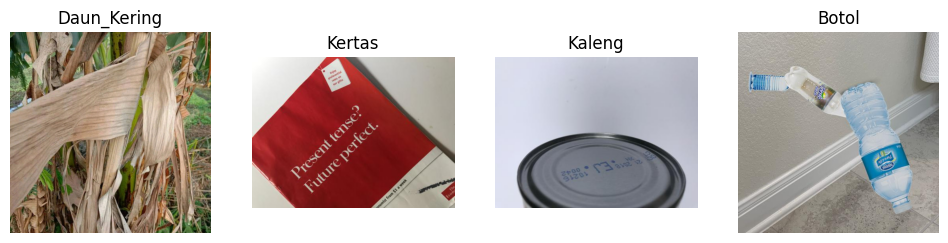

In [2]:
# Let's plot a few images
train_path = "Data/Train/"
validation_path = "Data/Validation/"
test_path = "Data/Test/"

image_categories = os.listdir('Data/Train/')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

# Preparation Data

In [3]:
img_height, img_width = 150, 150
batch_size = 32

In [4]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [5]:
# train
train_data = data_generator.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse')

# test
test_data = data_generator.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse')

# validation
val_data = data_generator.flow_from_directory(
    validation_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse')


Found 1600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [6]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_data.class_indices.items()])
print(class_map)

{0: 'Botol', 1: 'Daun_Kering', 2: 'Kaleng', 3: 'Kertas'}


In [18]:
# # save class map to txt file
# with open('class_map.txt', 'w') as file:
#     file.write(str(class_map))

# CNN Model

In [7]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

2023-06-02 21:35:17.137747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-02 21:35:17.138585: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-02 21:35:17.138661: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LimitMax): /proc/driver/nvidia/version does not exist
2023-06-02 21:35:17.139795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 21:35:17.341585: W tensorflow/tsl/framework/cpu_allocator_impl.c

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

2023-06-02 21:35:17.442497: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44859392 exceeds 10% of free system memory.
2023-06-02 21:35:17.471315: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44859392 exceeds 10% of free system memory.


_________________________________________________________________


In [8]:
# set callback apabila
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.87):
            print("\nAkurasi telah mencapai >87%!")
            self.model.stop_training = True
callbacks = myCallback()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [9]:
hist = model.fit(train_data, 
    epochs=100, 
    verbose=1, 
    validation_data=val_data, 
    callbacks=callbacks)

Epoch 1/100


2023-06-02 21:35:18.966151: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44859392 exceeds 10% of free system memory.
2023-06-02 21:35:18.987659: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44859392 exceeds 10% of free system memory.


50/50 [==============================] - 69s 1s/step - loss: 1.5636 - accuracy: 0.3425 - val_loss: 1.2080 - val_accuracy: 0.4500
Epoch 2/100
50/50 [==============================] - 65s 1s/step - loss: 1.1319 - accuracy: 0.5056 - val_loss: 1.0230 - val_accuracy: 0.6100
Epoch 3/100
50/50 [==============================] - 64s 1s/step - loss: 1.0707 - accuracy: 0.5531 - val_loss: 1.0900 - val_accuracy: 0.5350
Epoch 4/100
50/50 [==============================] - 63s 1s/step - loss: 1.0141 - accuracy: 0.5519 - val_loss: 0.9570 - val_accuracy: 0.6000
Epoch 5/100
50/50 [==============================] - 65s 1s/step - loss: 0.9136 - accuracy: 0.6250 - val_loss: 0.8381 - val_accuracy: 0.7000
Epoch 6/100
50/50 [==============================] - 67s 1s/step - loss: 0.8768 - accuracy: 0.6256 - val_loss: 0.8551 - val_accuracy: 0.6750
Epoch 7/100
50/50 [==============================] - 64s 1s/step - loss: 0.8507 - accuracy: 0.6594 - val_loss: 0.7609 - val_accuracy: 0.6750
Epoch 8/100
50/50 [======

In [10]:
# Predict the accuracy for the test set
model.evaluate(test_data)

7/7 [==============================] - 4s 602ms/step - loss: 0.4488 - accuracy: 0.8600


[0.4488300681114197, 0.8600000143051147]

1/1 [==============================] - 0s 55ms/step


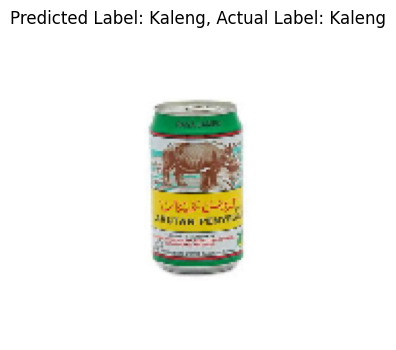

In [20]:
# Testing the Model
test_image_path = '../1.jpeg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Kaleng')

# Save model

In [19]:
# save model
model.save('doko.h5')